# Gender Classification Using KNN

- The Dataset used is the same data I used for the simple Logistic Regression.
- This is a data I made up and you can find the notebook and the data file at [GitHub](https://github.com/elakiricoder/Gender_Classification_KNN)

## 1 - Imports 

In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Read File 

In [647]:
df = pd.read_csv('male_female_v7.csv')

In [648]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Male
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


## 3 - Scale the Data

In [649]:
from sklearn.preprocessing import StandardScaler

In [650]:
scaler = StandardScaler()

In [651]:
# Fit all the features but not the label
scaler.fit(df.drop('Male',axis=1))

StandardScaler()

In [652]:
# Transforms all the features but not the label
scaled_features = scaler.transform(df.drop('Male',axis=1))

In [653]:
# Create a dataframe from the scaled features for visualizing the data
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.387194,-1.247933,0.283971,1.012273,-1.015924,1.013894,1.002202
1,-2.582682,0.739389,-1.009418,-0.987876,-1.015924,1.013894,-0.997803
2,-2.582682,-1.247933,0.653511,1.012273,0.984326,1.013894,1.002202
3,-2.582682,1.100720,0.283971,-0.987876,0.984326,1.013894,1.002202
4,0.387194,0.287725,-0.085568,-0.987876,-1.015924,-0.986297,-0.997803


## 4 - Split the Data

In [654]:
X = scaled_features
y = df['Male']

In [655]:
from sklearn.model_selection import train_test_split

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## 5 - Train the model

In [657]:
from sklearn.neighbors import KNeighborsClassifier

In [658]:
knn = KNeighborsClassifier(n_neighbors=1)

In [659]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [660]:
pred = knn.predict(X_test)

## 6 - Evaluate the Model 

In [661]:
from sklearn.metrics import classification_report,confusion_matrix

In [662]:
print(confusion_matrix(y_test,pred))

[[724  25]
 [ 33 719]]


In [663]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       749
           1       0.97      0.96      0.96       752

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



## 7 - Check the error rate at different K values

In [664]:
error_rate = []

# Will take some time
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

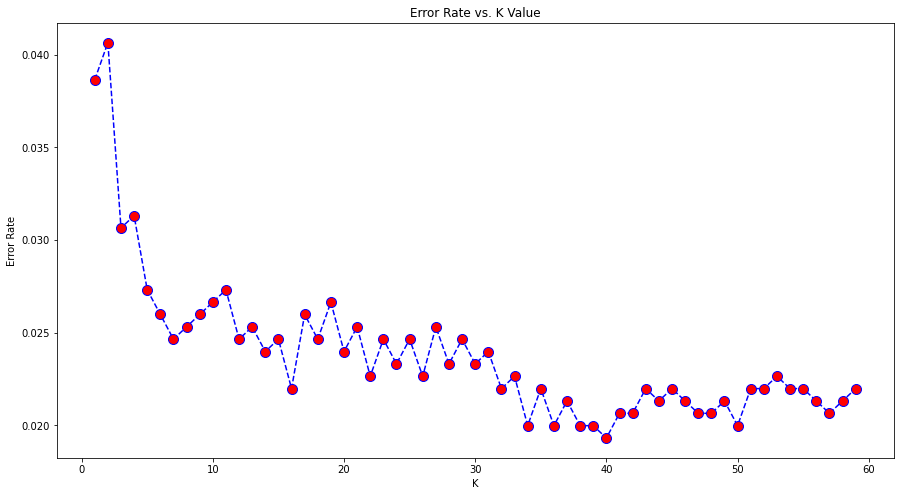

In [665]:
# Visualize the error rate
plt.figure(figsize=(15,8))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 8 - Identify the lowest error rate and modify the model

In [666]:
lowest_error_index = error_rate.index(min(error_rate))+1
print('Minimum Error Rate: ' + str(min(error_rate)))
print('Index position of Minimum Error Rate: ' + str(lowest_error_index))

Minimum Error Rate: 0.019320453031312457
Index position of Minimum Error Rate: 40


In [667]:
# Now with lowest_error_index
knn = KNeighborsClassifier(n_neighbors=lowest_error_index)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = ' + str(lowest_error_index))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

WITH K = 40


Confusion Matrix:
[[741   8]
 [ 21 731]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       749
           1       0.99      0.97      0.98       752

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501



## 9 - Test a sample

In [668]:
gender_index = 0

y_test_np = np.array(y_test)

if (y_test_np[gender_index] == 1) and (pred[gender_index] == 1):
    print('Actual Gender - Male ----- Predicted Gender - Male')
elif (y_test_np[gender_index] == 1) and (pred[gender_index] == 0):
    print('Actual Gender - Male ----- Predicted Gender - Female')
elif (y_test_np[gender_index] == 0) and (pred[gender_index] == 1):
    print('Actual Gender - Female ----- Predicted Gender - Male')
else:
    print('Actual Gender - Female ----- Predicted Gender - Female') 

Actual Gender - Male ----- Predicted Gender - Male
